In [84]:
import numpy as np
import pandas as pd


In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

In [86]:
import joblib

In [87]:
data = pd.read_csv("titanic_train.csv")
data

,Unnamed: 0,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,998,999,3rd,1,"McCarthy, Miss Katie",NaN,NaN,NaN,NaN,NaN,NaN,female
1,179,180,1st,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),male
2,556,557,2nd,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,male
3,174,175,1st,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),male
4,1232,1233,3rd,0,"Strilic, Mr Ivan",NaN,NaN,NaN,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...,...,...
914,455,456,2nd,1,"Ilett, Miss Bertha",17.0,Southampton,Guernsey,NaN,NaN,NaN,female
915,634,635,3rd,0,"Andreasson, Mr Paul Edvin",20.0,Southampton,"Sweden Chicago, IL",NaN,NaN,NaN,male
916,1266,1267,3rd,0,"Van Billiard, Mr Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,male
917,1246,1247,3rd,0,"Thomas, Mr Charles",NaN,NaN,NaN,NaN,NaN,NaN,male


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  919 non-null    int64  
 1   row.names   919 non-null    int64  
 2   pclass      919 non-null    object 
 3   survived    919 non-null    int64  
 4   name        919 non-null    object 
 5   age         439 non-null    float64
 6   embarked    571 non-null    object 
 7   home.dest   531 non-null    object 
 8   room        48 non-null     object 
 9   ticket      46 non-null     object 
 10  boat        233 non-null    object 
 11  sex         919 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 86.3+ KB


In [89]:
data.describe()

,Unnamed: 0,row.names,survived,age
count,919.000000,919.000000,919.000000,439.000000
mean,656.562568,657.562568,0.342764,31.063591
std,380.787154,380.787154,0.474892,14.799631
min,0.000000,1.000000,0.000000,0.333300
25%,323.500000,324.500000,0.000000,21.000000
50%,660.000000,661.000000,0.000000,29.000000
75%,984.500000,985.500000,1.000000,41.000000
max,1312.000000,1313.000000,1.000000,71.000000


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt 

<AxesSubplot:>

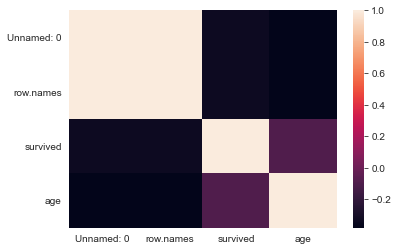

In [91]:
sns.heatmap(data.corr())

<AxesSubplot:>

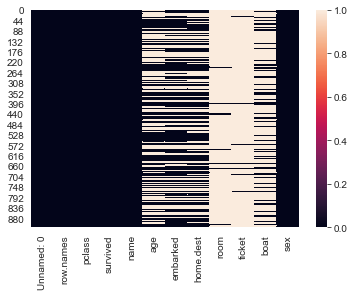

In [92]:
sns.heatmap(data.isnull())

C:\Users\Abhijit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

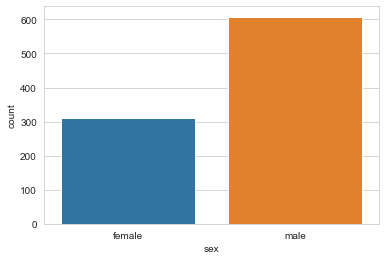

In [95]:
sns.countplot('sex',data=data)

C:\Users\Abhijit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

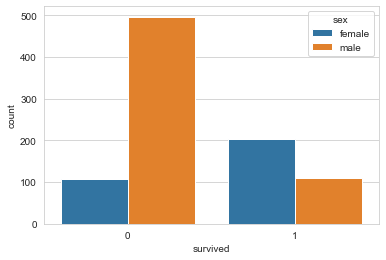

In [96]:
sns.countplot('survived',hue='sex',data=data)


C:\Users\Abhijit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

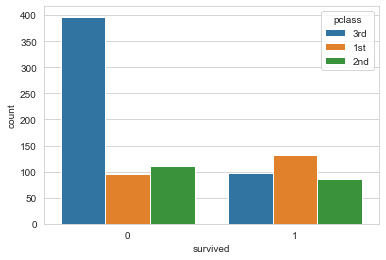

In [97]:
sns.set_style('whitegrid')
sns.countplot('survived',hue='pclass',data=data)

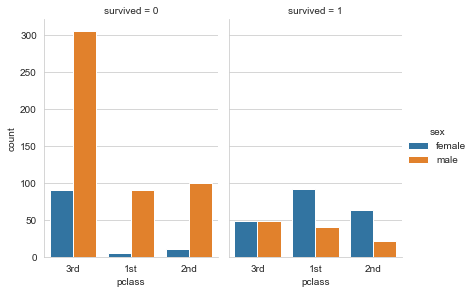

In [98]:
###Now Checking classwise survived graph and checking how many percentage of male and female survived
sns.catplot(x="pclass", hue="sex", col="survived",data=data, kind="count",height=4, aspect=.7)


C:\Users\Abhijit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

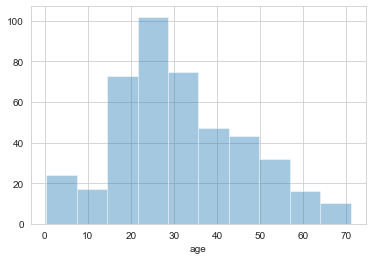

In [99]:
sns.distplot(data['age'].dropna(),bins=10,kde=False)

<AxesSubplot:xlabel='pclass', ylabel='age'>

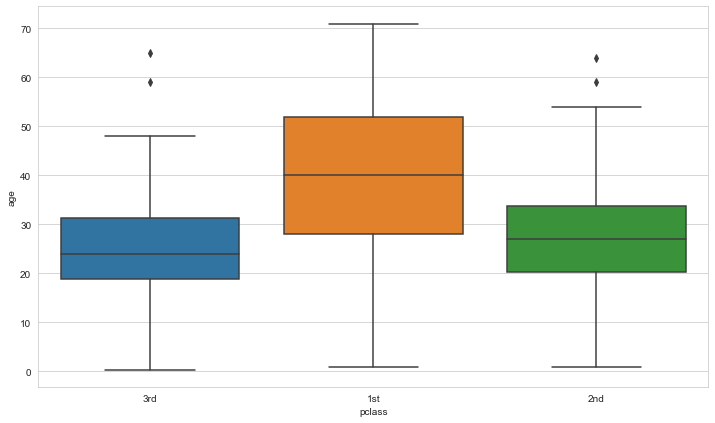

In [100]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=data)

Data cleaning

We got avg age from boxplot we will fill remaining values of ages in particular class with this values.

In [101]:
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass== 1:
            return 40
        if Pclass == 2:
            return 28
        else:
            return 24
        
    else:
        return Age
    

In [102]:
data['age']=data[['age','pclass']].apply(fill_age,axis=1)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  919 non-null    int64  
 1   row.names   919 non-null    int64  
 2   pclass      919 non-null    object 
 3   survived    919 non-null    int64  
 4   name        919 non-null    object 
 5   age         919 non-null    float64
 6   embarked    571 non-null    object 
 7   home.dest   531 non-null    object 
 8   room        48 non-null     object 
 9   ticket      46 non-null     object 
 10  boat        233 non-null    object 
 11  sex         919 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 86.3+ KB


In [104]:
data_input = data[['pclass','age','sex']]

In [105]:
expected_output = data[['survived']]
data_input['pclass'].replace('3rd', 3, inplace = True)
data_input['pclass'].replace('2nd', 2, inplace = True)
data_input['pclass'].replace('1st', 1, inplace = True)

In [106]:
data_input['sex'] = np.where(data_input['sex'] == 'female', 0, 1)

In [107]:
input_train, input_test, expected_op_train, expected_op_test = train_test_split(data_input, expected_output, test_size=0.33, random_state = 1000)


In [108]:
gbc=GradientBoostingClassifier()
gbc.fit(input_train, expected_op_train)

C:\Users\Abhijit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [109]:
accuracy = gbc.score(input_test, expected_op_test)
print("accuracy is {}%".format(accuracy*100))

accuracy is 83.22368421052632%


In [110]:
joblib.dump(gbc, "titanic_survival_predictor_model", compress = 9)

['titanic_survival_predictor_model']